<a href="https://colab.research.google.com/github/riponalmamun/CSE_303_BMI_Index_Depression_Classification/blob/main/CSE_303_BMI_Index_Depression_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Dataset

In [ ]:
!gdown --id 1cQrNtrsgMhYtGSvEvU-Ox9YOHhXSdSkO

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1cQrNtrsgMhYtGSvEvU-Ox9YOHhXSdSkO
To: /content/Raw dataset_MJH.xlsx
100% 199k/199k [00:00<00:00, 79.6MB/s]


# Load Dataset

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
df = pd.read_excel('/content/Raw dataset_MJH.xlsx')

In [ ]:
df.head()

,Sr No,1. Gender=?,2. Age (years)=?,3. Education level=?,4. Current living area=?,5. Monthly family income (taka),6. University type=?,7. Hieght (cm),8. BMI-before COVID,9. BMI at present,...,12. Physical exercise,13. Physical activity,14. Sound sleep at night,15. physical disturbance,16. Feeling lonely,17. Feeling depressed,18. Feeling anxious,19. Had suicidal thoughts,20.\tHad conflict/arguments with othe,21. Been verbally or physically abused
0,1,Male,≥ 25,4th/5th/Master’s/Higher,Urban,25 to 50 thousand,Public,167.64,24.908222,27.754876,...,Decreased,Decreased,Decreased,Increased,Yes,Yes,Yes,No,Yes,Yes
1,2,Female,22 to 24,4th/5th/Master’s/Higher,Urban,above 50 thousand,Public,154.94,21.244332,22.910554,...,Decreased,Decreased,Same as before COVID-19,Decreased,No,No,No,No,Yes,No
2,3,Female,22 to 24,4th/5th/Master’s/Higher,Urban,above 50 thousand,Public,152.40,18.944482,21.097264,...,Decreased,Decreased,Decreased,Increased,No,No,No,No,Yes,No
3,4,Female,22 to 24,4th/5th/Master’s/Higher,Urban,above 50 thousand,Public,154.94,20.411221,19.578110,...,Same as before COVID-19,Decreased,Decreased,Increased,Yes,Yes,Yes,Yes,Yes,Yes
4,5,Female,22 to 24,4th/5th/Master’s/Higher,Urban,above 50 thousand,Public,160.02,29.289552,30.461134,...,Decreased,Decreased,Decreased,Increased,No,Yes,Yes,No,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Sr No                                   1602 non-null   int64  
 1   1. Gender=?                             1602 non-null   object 
 2   2. Age (years)=?                        1602 non-null   object 
 3   3. Education level=?                    1602 non-null   object 
 4   4. Current living area=?                1602 non-null   object 
 5   5. Monthly family income (taka)         1602 non-null   object 
 6   6. University type=?                    1602 non-null   object 
 7   7. Hieght (cm)                          1602 non-null   float64
 8   8. BMI-before COVID                     1602 non-null   float64
 9   9. BMI at present                       1602 non-null   float64
 10  10. Smoking habit=?                     1602 non-null   obje

# Data preparation and Feature Engineering

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Load data
data =  pd.read_excel('/content/Raw dataset_MJH.xlsx')

In [ ]:

# Handle missing values
# Assuming missing values can be replaced with the mean for continuous and mode for categorical
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].fillna(data[column].mode()[0])
    else:
        data[column] = data[column].fillna(data[column].mean())


In [ ]:
# Convert categorical variables using Label Encoding
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le



In [ ]:
# Feature Engineering
# Deriving categorical bins for age and BMI
data['Age Group'] = pd.cut(data['2. Age (years)=?'], bins=[0, 18, 35, 50, 65, 100], labels=['Child', 'Youth', 'Adult', 'Middle-aged', 'Senior'])
data['BMI Category'] = pd.cut(data['8. BMI-before COVID'], bins=[0, 18.5, 24.9, 29.9, 40], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Encode new categorical features
data['Age Group'] = LabelEncoder().fit_transform(data['Age Group'])
data['BMI Category'] = LabelEncoder().fit_transform(data['BMI Category'])

In [ ]:
data.head()

,Sr No,1. Gender=?,2. Age (years)=?,3. Education level=?,4. Current living area=?,5. Monthly family income (taka),6. University type=?,7. Hieght (cm),8. BMI-before COVID,9. BMI at present,...,14. Sound sleep at night,15. physical disturbance,16. Feeling lonely,17. Feeling depressed,18. Feeling anxious,19. Had suicidal thoughts,20.\tHad conflict/arguments with othe,21. Been verbally or physically abused,Age Group,BMI Category
0,1,1,2,1,1,0,2,167.64,24.908222,27.754876,...,0,1,1,1,1,0,1,1,0,2
1,2,0,0,1,1,1,2,154.94,21.244332,22.910554,...,2,0,0,0,0,0,1,0,1,0
2,3,0,0,1,1,1,2,152.40,18.944482,21.097264,...,0,1,0,0,0,0,1,0,1,0
3,4,0,0,1,1,1,2,154.94,20.411221,19.578110,...,0,1,1,1,1,1,1,1,1,0
4,5,0,0,1,1,1,2,160.02,29.289552,30.461134,...,0,1,0,1,1,0,0,0,1,2


In [ ]:
# Evaluate correlations and drop highly correlated features if necessary
correlation_matrix = data.corr()
correlation_matrix

,Sr No,1. Gender=?,2. Age (years)=?,3. Education level=?,4. Current living area=?,5. Monthly family income (taka),6. University type=?,7. Hieght (cm),8. BMI-before COVID,9. BMI at present,...,14. Sound sleep at night,15. physical disturbance,16. Feeling lonely,17. Feeling depressed,18. Feeling anxious,19. Had suicidal thoughts,20.\tHad conflict/arguments with othe,21. Been verbally or physically abused,Age Group,BMI Category
Sr No,1.000000,0.084667,0.082969,-0.054257,-0.010327,0.145854,0.232339,0.067585,0.027180,0.014514,...,-0.032457,-0.049883,0.058941,0.039957,0.043204,0.080355,0.127255,0.224418,-0.091437,-0.069163
1. Gender=?,0.084667,1.000000,-0.014891,0.014109,-0.093113,0.124522,0.040254,0.593023,0.086386,0.069209,...,0.040932,-0.012579,-0.032815,-0.075664,-0.106039,-0.054511,-0.059508,0.055121,0.068449,-0.080634
2. Age (years)=?,0.082969,-0.014891,1.000000,0.098602,-0.000119,-0.024529,-0.013605,-0.000503,0.062939,0.085441,...,0.019856,0.017100,0.050286,0.024660,0.013197,0.052489,0.018877,0.060075,-0.903584,0.041280
3. Education level=?,-0.054257,0.014109,0.098602,1.000000,0.060860,-0.092132,0.057905,0.014588,0.056376,0.053405,...,-0.012555,-0.056514,-0.035444,0.036317,0.013072,-0.007320,0.027168,0.025765,0.131634,-0.024222
4. Current living area=?,-0.010327,-0.093113,-0.000119,0.060860,1.000000,-0.127608,0.024159,-0.026529,0.022123,-0.013857,...,-0.045093,0.024895,0.010597,-0.025501,0.013571,-0.042642,0.055892,-0.063921,0.024839,-0.006758
5. Monthly family income (taka),0.145854,0.124522,-0.024529,-0.092132,-0.127608,1.000000,-0.006158,0.027169,-0.071601,0.003036,...,0.036206,0.025300,-0.008969,0.037140,0.055029,0.016633,0.008095,0.123372,-0.022334,0.012794
6. University type=?,0.232339,0.040254,-0.013605,0.057905,0.024159,-0.006158,1.000000,0.039053,-0.066847,-0.026303,...,-0.047235,-0.020560,0.087247,0.076607,0.118264,0.059759,0.078720,0.069117,0.054388,-0.075212
7. Hieght (cm),0.067585,0.593023,-0.000503,0.014588,-0.026529,0.027169,0.039053,1.000000,-0.124160,-0.081849,...,-0.000452,0.001027,-0.006948,-0.041615,-0.075390,0.010346,-0.052493,0.021158,0.041917,-0.041808
8. BMI-before COVID,0.027180,0.086386,0.062939,0.056376,0.022123,-0.071601,-0.066847,-0.124160,1.000000,0.468820,...,-0.025539,-0.038419,0.017342,-0.010991,0.013467,0.033419,0.054119,0.026206,-0.025617,0.018899
9. BMI at present,0.014514,0.069209,0.085441,0.053405,-0.013857,0.003036,-0.026303,-0.081849,0.468820,1.000000,...,-0.034555,-0.038400,-0.020552,0.017198,0.024842,0.016208,0.015832,0.033162,-0.045797,0.033348


In [ ]:
high_corr = correlation_matrix.index[correlation_matrix["17. Feeling depressed"] > 0.5]  # arbitrary threshold
high_corr

Index(['17. Feeling depressed', '18. Feeling anxious'], dtype='object')

In [ ]:
# Normalize or scale continuous variables
scaler = MinMaxScaler()  # or use StandardScaler() for models like SVM
continuous_columns = [col for col in data.columns if data[col].dtype in ['float64', 'int64']]
data[continuous_columns] = scaler.fit_transform(data[continuous_columns])


In [ ]:
y = data['17. Feeling depressed']
X = data.drop('17. Feeling depressed', axis=1)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Train Support Vector Machine (SVM)

In [ ]:
# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Train Neural Network

In [ ]:
# Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


# Train XGBoost

In [ ]:
# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)



# Train Logistic Regression

In [ ]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluation function to print the metrics

In [ ]:
# Evaluation function to print the metrics
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    print(f"Model: {model_name}")
    print(confusion_matrix(y_test, y_pred))
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}\n")


# Evaluating all models
evaluate_model(y_test, y_pred_rf, 'Random Forest')
evaluate_model(y_test, y_pred_svm, 'SVM')
evaluate_model(y_test, y_pred_nn, 'Neural Network')
evaluate_model(y_test, y_pred_xgb, 'XGBoost')
evaluate_model(y_test, y_pred_lr, 'Logistic Regression')


Model: Random Forest
[[ 52  35]
 [ 17 217]]
Random Forest Performance:
Accuracy: 0.8380
Precision: 0.8074
Recall: 0.7625
F1-Score: 0.7798

Model: SVM
[[ 58  29]
 [ 25 209]]
SVM Performance:
Accuracy: 0.8318
Precision: 0.7885
Recall: 0.7799
F1-Score: 0.7840

Model: Neural Network
[[ 55  32]
 [ 19 215]]
Neural Network Performance:
Accuracy: 0.8411
Precision: 0.8068
Recall: 0.7755
F1-Score: 0.7886

Model: XGBoost
[[ 56  31]
 [ 23 211]]
XGBoost Performance:
Accuracy: 0.8318
Precision: 0.7904
Recall: 0.7727
F1-Score: 0.7806

Model: Logistic Regression
[[ 50  37]
 [ 22 212]]
Logistic Regression Performance:
Accuracy: 0.8162
Precision: 0.7729
Recall: 0.7403
F1-Score: 0.7534



# SHapley Additive exPlanations (SHAP)

Uses game theory to explain the output of any machine learning model by computing the contribution of each feature to a prediction.

In [ ]:
!pip install shap

In [ ]:
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

# Understanding the SHAP Force Plot


#The SHAP (SHapley Additive exPlanations) force_plot is an effective visualization tool for understanding the impact of each feature on a model's prediction for a single observation. It illustrates how each feature contributes, either positively or negatively, to the final prediction relative to the average prediction (baseline).



# Here’s a breakdown of the key components of a SHAP force plot:

# Base Value: This is the average prediction for the dataset, provided by the model over the training data. In classification, this would be the log odds of the baseline class, while in regression, it's the average outcome.

# Output Value: This is the actual prediction for the specific instance being explained. It is displayed at the end of the force plot.

# Features: Each feature that affects the prediction is shown as a force. Each force can either:

# Push to the right (positive effect): These are features that push the model’s prediction higher than the base value. They are usually shown in red.

#Push to the left (negative effect): These are features that push the model’s prediction lower than the base value. They are usually shown in blue.
# Size of the Force: The size or length of each force represents the magnitude of that feature’s impact on the prediction. Larger forces have a more significant impact.

In [ ]:
# Train the model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

shap.initjs()
# Create the SHAP explainer and calculate SHAP values
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_train)

# Visualize the first prediction's explanation
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[0,:], X_train.iloc[0,:])


Tips for Interpreting Force Plots
Look for Dominant Features: Identify which features have the longest bars (either red or blue). These are the features most influential for this particular prediction.

Understand Thresholds: In classification tasks, consider where the final output value lies relative to a decision threshold. This can inform how features collectively move the prediction across this threshold.

Compare Instances: By looking at multiple force plots for different instances, you can see how feature contributions vary across the dataset, which might indicate patterns or inconsistencies in model behavior.

# Explanation:
# The bar plot shows the average impact of each feature on the model output magnitude,
# sorted by the importance of the features.
# The beeswarm plot provides a deeper insight into the positive and negative relationships of the features
# with the target variable, along with the distribution of the SHAP values for each feature across all data points.

/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:962: UserWarning: Glyph 9 (	) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


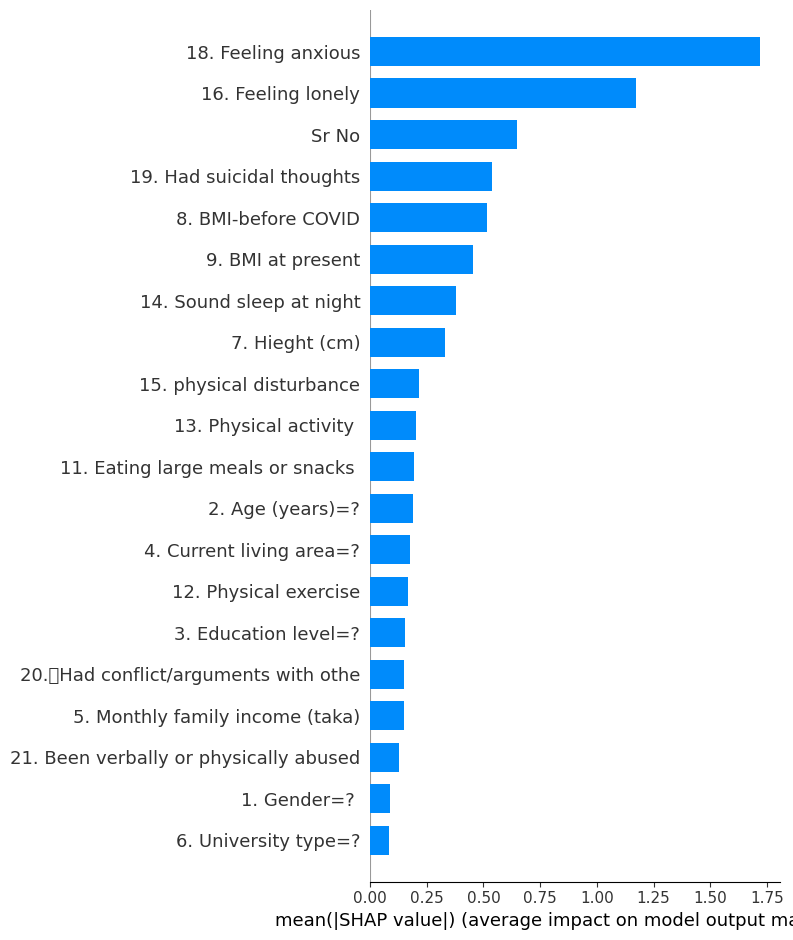

/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:962: UserWarning: Glyph 9 (	) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


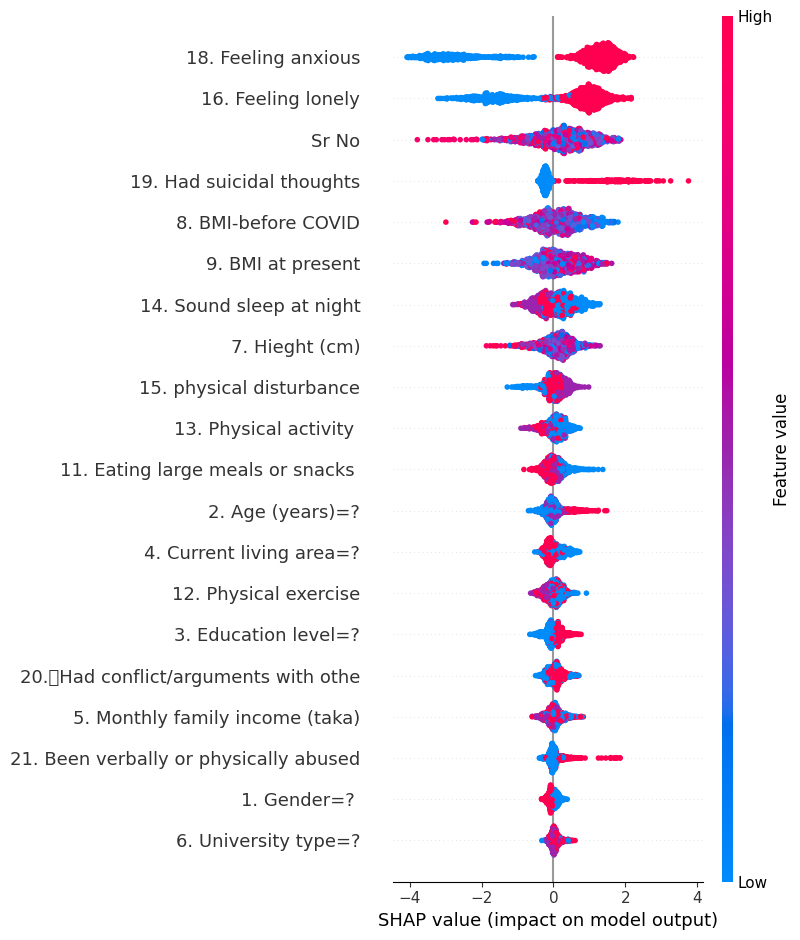

In [ ]:
# Assuming X_train and y_train are already defined and preprocessed
# Train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, verbosity=1, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Create the SHAP explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

# You can also create a detailed SHAP summary plot (beeswarm plot) to see the distribution
shap.summary_plot(shap_values, X_train, plot_type='dot')




## Examine how changes in a feature change the model’s prediction

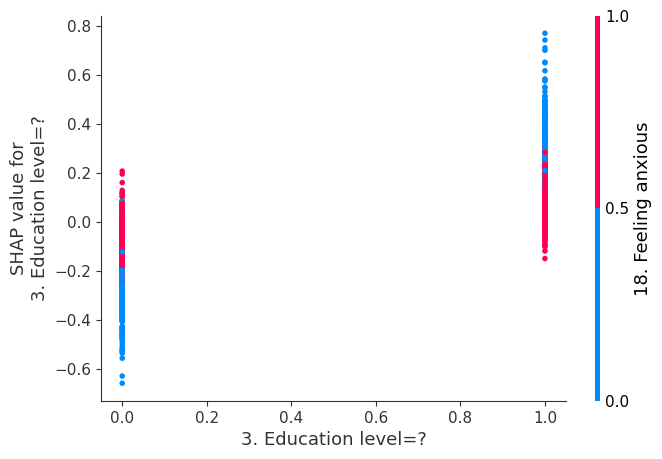

In [ ]:
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

# Assuming the XGBoost model and data are already defined and loaded: xgb_model, X_train

# Create the SHAP explainer and calculate SHAP values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

# Plot the SHAP dependence plot for a specific feature
# The following example assumes 'feature_name' is the name of the feature you're interested in
feature_name = '3. Education level=?'  # Replace 'example_feature_name' with your actual feature of interest

# Select a feature for coloring to show interactions; if not sure, let SHAP choose one
interaction_index = 'auto'  # Set to 'auto' or specify another feature name

shap.dependence_plot(ind=feature_name, shap_values=shap_values, features=X_train, interaction_index=interaction_index)

# Explanation:
# Each point on the plot represents a single datapoint in the dataset.
# The x-axis shows the value of the feature, and the y-axis shows the SHAP value for that feature.
# The color represents the value of the interacting feature, providing insight into how two features interact to impact the model output.


# Local Interpretable Model-agnostic Explanations (LIME)

Explains individual predictions by approximating the local decision boundary with an interpretable model (like linear models).

In [ ]:
!pip install lime

## Understanding LIME Plot Components
- Prediction: The overall prediction of the classifier for the specific instance being explained. This is usually shown at the top of the plot.

- Local Model: LIME creates a simple model (like a linear model) that approximates the behavior of the complex model near the instance being explained. This local model is used to interpret the result.

Feature Contributions:

- Positive Contributions (Green Bars): Features that push the model’s prediction in the positive direction (towards the predicted class). The length of the bar indicates the strength of the contribution.
- Negative Contributions (Red Bars): Features that push the model’s prediction in the negative direction (away from the predicted class). Again, the length of the bar reflects the magnitude of the impact.
- Base Line/Intercept: This is the starting point of the prediction, assuming no features are contributing. It's akin to a baseline from which the contributions of all features are measured.

In [ ]:
import xgboost as xgb
from lime import lime_tabular
import numpy as np

# Assume X_train, y_train are already defined and the XGBoost model is trained:
# xgb_model = xgb.XGBClassifier(...)
# xgb_model.fit(X_train, y_train)

# Create a LIME explainer object
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Negative', 'Positive'],  # Adjust based on your target classes
    mode='classification'
)

# Select the instance to explain
i = 1  # Index of the instance in the test set
instance = X_train.iloc[i]

# Generate explanations
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=xgb_model.predict_proba
)

# Visualize the explanation
exp.show_in_notebook(show_table=True, show_all=False)

# Explanation:
# This will generate an HTML output showing the contribution of each feature to the prediction of the selected instance.


Tips for Interpreting LIME Plots

- Consistency Check: Verify that the prediction shown in the LIME plot matches what your complex model outputs for the same instance. Inconsistencies might suggest that the local approximation isn't well fitted.

- Feature Values: Alongside the contribution bars, the feature values of the instance being explained are often displayed. This helps to contextualize why certain features are impacting the prediction in a specific way.

- Model Simplicity: The local model should be simple enough to understand but complex enough to accurately approximate the complex model near the instance. If the local model is too simple, it may not provide a faithful explanation.

- Exploring Multiple Instances: LIME explanations can vary significantly across different instances. To get a fuller understanding of the model’s behavior, generate and compare explanations for multiple different instances, especially those where the model performs poorly or unexpectedly.